# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [181]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [132]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud'>

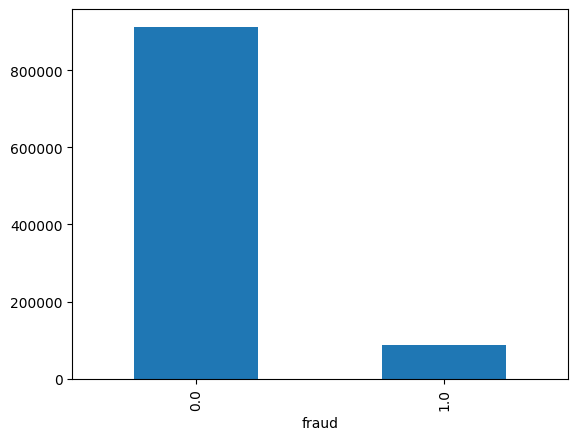

In [135]:
dist = fraud['fraud'].value_counts()
dist.plot(kind="bar")

In [136]:
numerical_features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

scaler = StandardScaler()
fraud[numerical_features] = scaler.fit_transform(fraud[numerical_features])

In [137]:
features = fraud.drop(columns='fraud')
target = fraud['fraud']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [139]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [140]:
log_pred = log_reg.predict(X_test)

In [141]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))

Accuracy: 0.958755
Precision: 0.8915005961505706
Recall: 0.6001261250931605


In [142]:
isfraud = fraud[fraud['fraud'] == 1]
nofraud = fraud[fraud['fraud'] == 0]

## Oversampling

In [143]:
isfraud_oversampled = resample(isfraud, 
                                    replace=True, 
                                    n_samples = len(nofraud),
                                    random_state=0)

In [144]:
train_over = pd.concat([isfraud_oversampled, nofraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
781436,-0.144849,-0.154918,5.728813,0.366584,1.361576,-0.334458,0.732909,1.0
498904,0.669757,-0.155277,2.638662,0.366584,-0.734443,-0.334458,0.732909,1.0
488212,-0.244676,-0.158820,0.890558,0.366584,1.361576,-0.334458,0.732909,1.0
525384,-0.356513,0.017402,12.400372,0.366584,1.361576,-0.334458,0.732909,1.0
244343,2.795740,0.360165,0.986284,0.366584,1.361576,-0.334458,0.732909,1.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425,0.0
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425,0.0
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909,0.0
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909,0.0


<Axes: xlabel='fraud'>

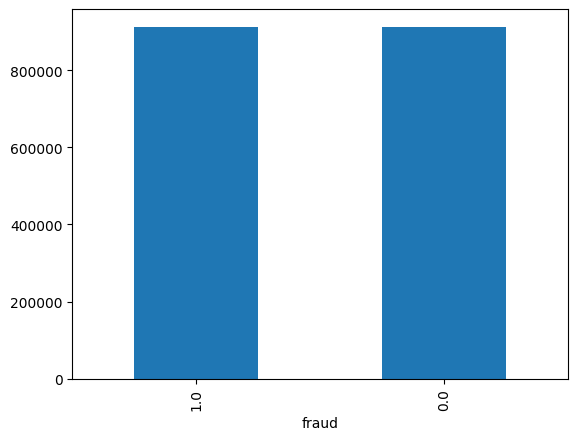

In [145]:
dist_over = train_over['fraud'].value_counts()
dist_over.plot(kind="bar")

In [146]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]
logreg_isfraud_oversampled = LogisticRegression()
logreg_isfraud_oversampled.fit(X_train_over, y_train_over)

LogisticRegression()

In [147]:
log_pred_over = logreg_isfraud_oversampled.predict(X_test)
print("Accuracy:", accuracy_score(y_test, log_pred_over))
print("Precision:", precision_score(y_test, log_pred_over))
print("Recall:", recall_score(y_test, log_pred_over))

Accuracy: 0.93462
Precision: 0.5757817651754417
Recall: 0.9510978616063751


## Undersampling

In [148]:
nofraud_undersampled = resample(nofraud, 
                                    replace=True, 
                                    n_samples = len(isfraud),
                                    random_state=0)

In [149]:
train_under = pd.concat([nofraud_undersampled, isfraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334629,1.038999,-0.071295,-0.341128,0.366584,-0.734443,-0.334458,0.732909,0.0
477497,-0.270801,-0.178864,-0.043663,0.366584,1.361576,2.989911,0.732909,0.0
129232,-0.247629,-0.189915,-0.445880,0.366584,-0.734443,-0.334458,-1.364425,0.0
166821,0.052355,-0.187104,-0.287385,0.366584,-0.734443,-0.334458,0.732909,0.0
966902,-0.246573,-0.178511,-0.365576,0.366584,-0.734443,-0.334458,-1.364425,0.0
...,...,...,...,...,...,...,...,...
999908,0.285482,-0.160731,2.512041,0.366584,-0.734443,-0.334458,0.732909,1.0
999916,2.148790,-0.183967,-0.541406,0.366584,-0.734443,-0.334458,0.732909,1.0
999919,1.498856,-0.194718,-0.496251,0.366584,-0.734443,-0.334458,0.732909,1.0
999939,0.379015,-0.062190,10.033647,0.366584,-0.734443,-0.334458,0.732909,1.0


<Axes: xlabel='fraud'>

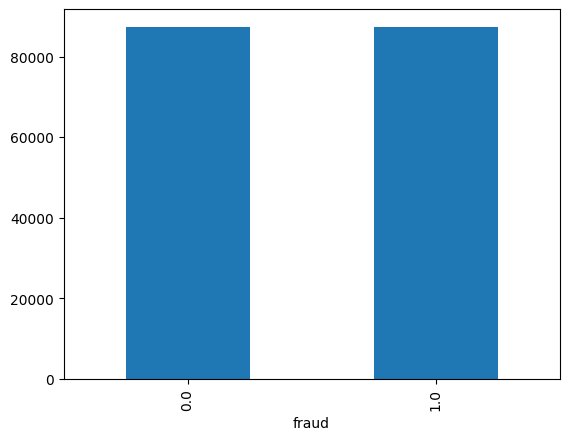

In [150]:
dist_under = train_under['fraud'].value_counts()
dist_under.plot(kind="bar")

In [172]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]
logreg_nofraud_undersampled = LogisticRegression()
logreg_nofraud_undersampled.fit(X_train_under, y_train_under)

LogisticRegression()

In [174]:
log_pred_under = logreg_nofraud_undersampled.predict(X_test)
print("Accuracy:", accuracy_score(y_test, log_pred_under))
print("Precision:", precision_score(y_test, log_pred_under))
print("Recall:", recall_score(y_test, log_pred_under))

Accuracy: 0.934865
Precision: 0.5767306088407006
Recall: 0.9514418391331766


## SMOTE

In [183]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [185]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [189]:
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [191]:
logreg_smote.score(X_test, y_test)

0.934785